# scikit-learn
***

## What is scikit-learn?
***
scikit-learn is a free open source python library that provides several tools for statistical modeling and machine learning. These include:
- Classification algorithms, used to identify the category an object belongs to.
- Regression algorithms, used to predict continuous-valued attributes associated with an object.
- Clustering algorithms, used to group objects that share similar features together.
- Dimensionality reduction algorithms, used to reduce the number of features within a data sample down to a set of principal features.
- Support algorithms and functions, used for data preparation, cleaning, and model selection.

scikit-learn is implemented for the most part in python but also uses cython for certain algorithms where performance is a priority. The library is also built upon or can be integrated with other libraries like NumPy, SciPy, and Mathplotlib.

## Setup
***

In [1]:
# Imports

# Numerical arrays
import numpy as np

# Data frames and series
import pandas as pd

# Plots
import matplotlib.pyplot as plt

# Fancier Plots
import seaborn as sns

# scikit-learn
# Model selection helpers used for train_test_split
import sklearn.model_selection as mod

# Decision Tree
import sklearn.tree as tr

# Random forest
import sklearn.ensemble as ens

In [2]:
# Sets plot size.
plt.rcParams['figure.figsize'] = (20, 15)

# Sets colour scheme.
plt.style.use('ggplot')

## Red Wine Quality Dataset
https://archive.ics.uci.edu/ml/datasets/Wine+Quality

***

### Dataset features:

***Independent features:***

1. Fixed acidity
2. Volatile acidity
3. Citric acid
4. Residual sugar
5. Chlorides
6. Free sulfer dioxide
7. Total sulfur dioxide
8. Density
9. pH
10. Sulphates
11. Alcohol

***Dependent feature:***

* Quality

***

In [3]:
# Load the red wine dataset from the datasets directory into a pandas dataframe called wine
wine = pd.read_csv("datasets/winequality-red.csv")

In [4]:
# Getting a look at the dataset
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [5]:
# Displays summary statistics for dataset.
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
# Gives the count of NaN values for each column in the dataframe
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

**Notes:**
* Dataset appears to have no missing values.

In [7]:
# Gives the unique values for quality and orders by most to least common
wine['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

**Notes:**
* [Wine Quality Data Set](https://archive.ics.uci.edu/ml/datasets/Wine+Quality) page describes quality scale as being from 0 to 10 but only contains values from 3 to 8.

In [8]:
# Changes quality attribute to catagory where a quality [3, 4, 5] = Low and [6, 7, 8] = High
# This is done to simplify the classification problem
wine["quality"] = pd.cut(wine["quality"], bins = [-np.inf, 5, np.inf], labels = ["Low", "High"])

In [9]:
# Getting a look at new quality values
wine["quality"]

0        Low
1        Low
2        Low
3       High
4        Low
        ... 
1594     Low
1595    High
1596    High
1597     Low
1598    High
Name: quality, Length: 1599, dtype: category
Categories (2, object): ['Low' < 'High']

## Visualising Dataset
***

array([[<AxesSubplot:title={'center':'fixed acidity'}>,
        <AxesSubplot:title={'center':'volatile acidity'}>,
        <AxesSubplot:title={'center':'citric acid'}>],
       [<AxesSubplot:title={'center':'residual sugar'}>,
        <AxesSubplot:title={'center':'chlorides'}>,
        <AxesSubplot:title={'center':'free sulfur dioxide'}>],
       [<AxesSubplot:title={'center':'total sulfur dioxide'}>,
        <AxesSubplot:title={'center':'density'}>,
        <AxesSubplot:title={'center':'pH'}>],
       [<AxesSubplot:title={'center':'sulphates'}>,
        <AxesSubplot:title={'center':'alcohol'}>, <AxesSubplot:>]],
      dtype=object)

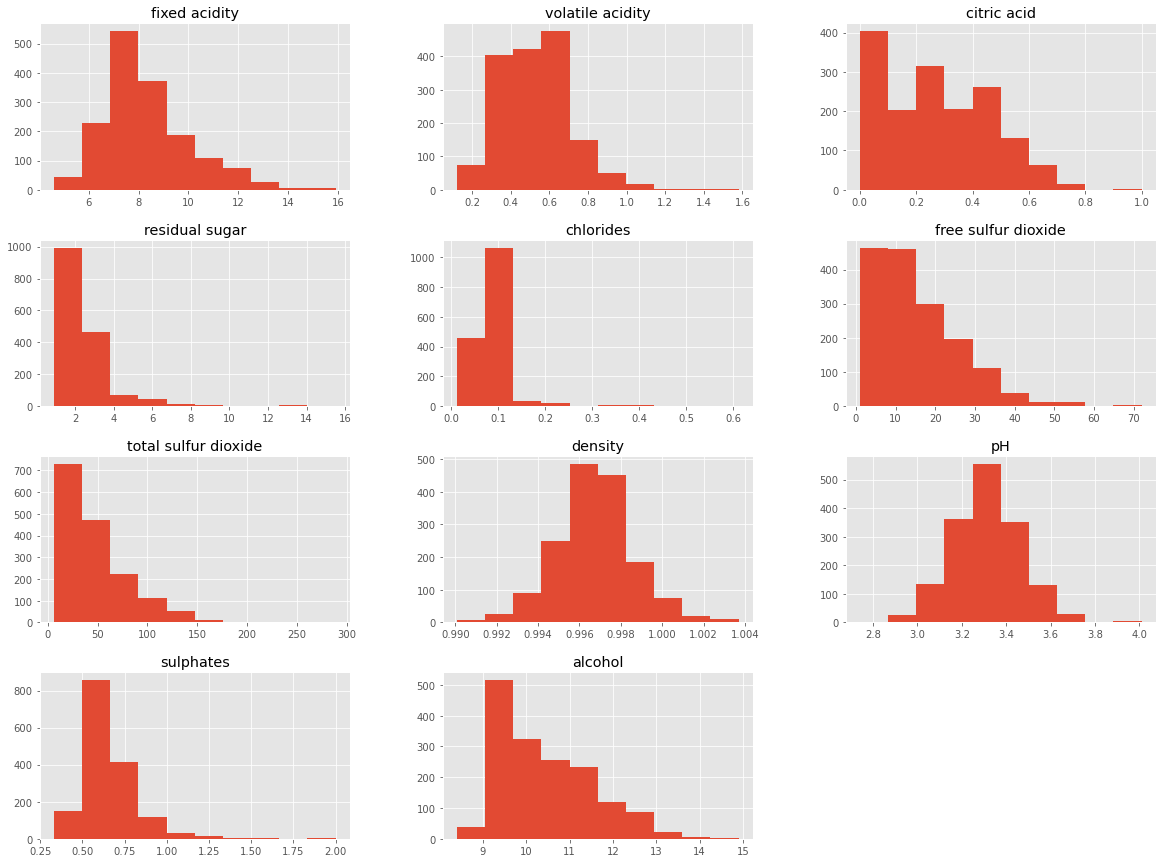

In [10]:
# Displays histograms of dataset attributes
wine.hist()

<AxesSubplot:>

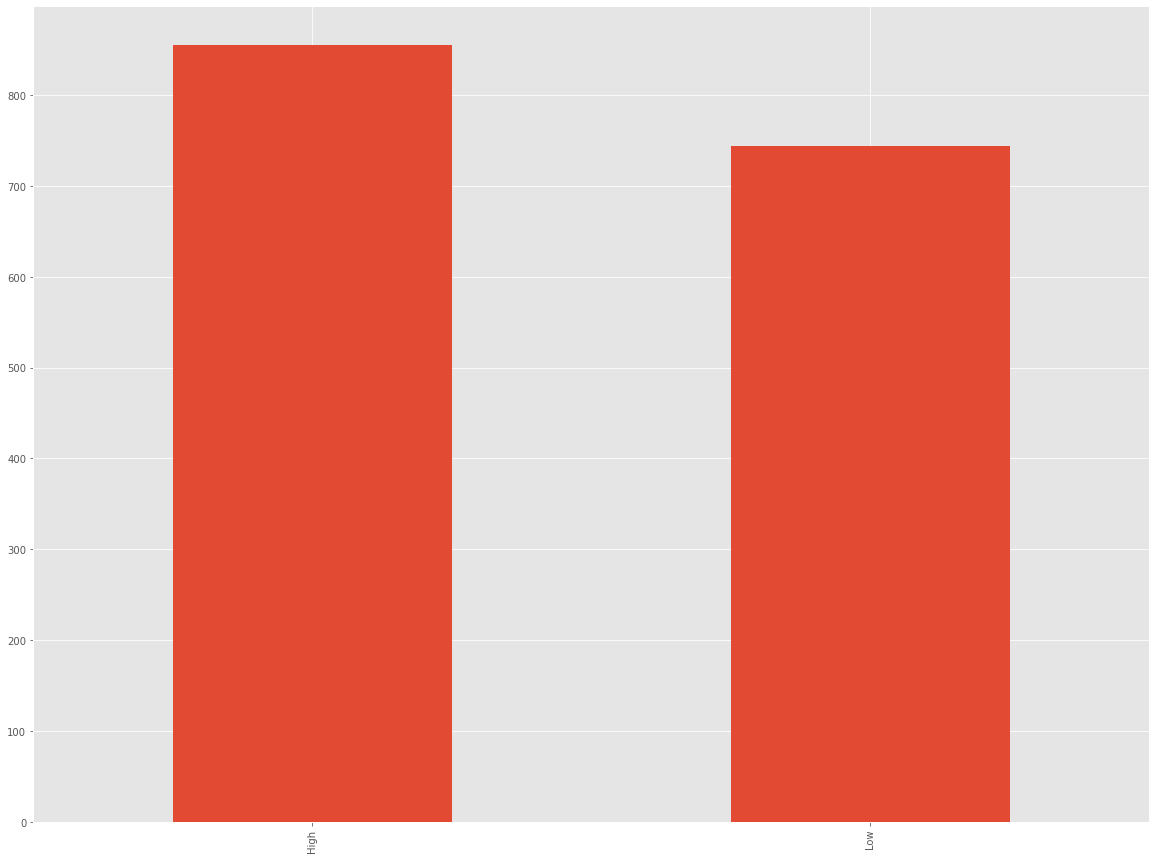

In [11]:
# Displays barchart showing quantity of records in dataset for a given quality category
wine['quality'].value_counts().plot(kind='bar')

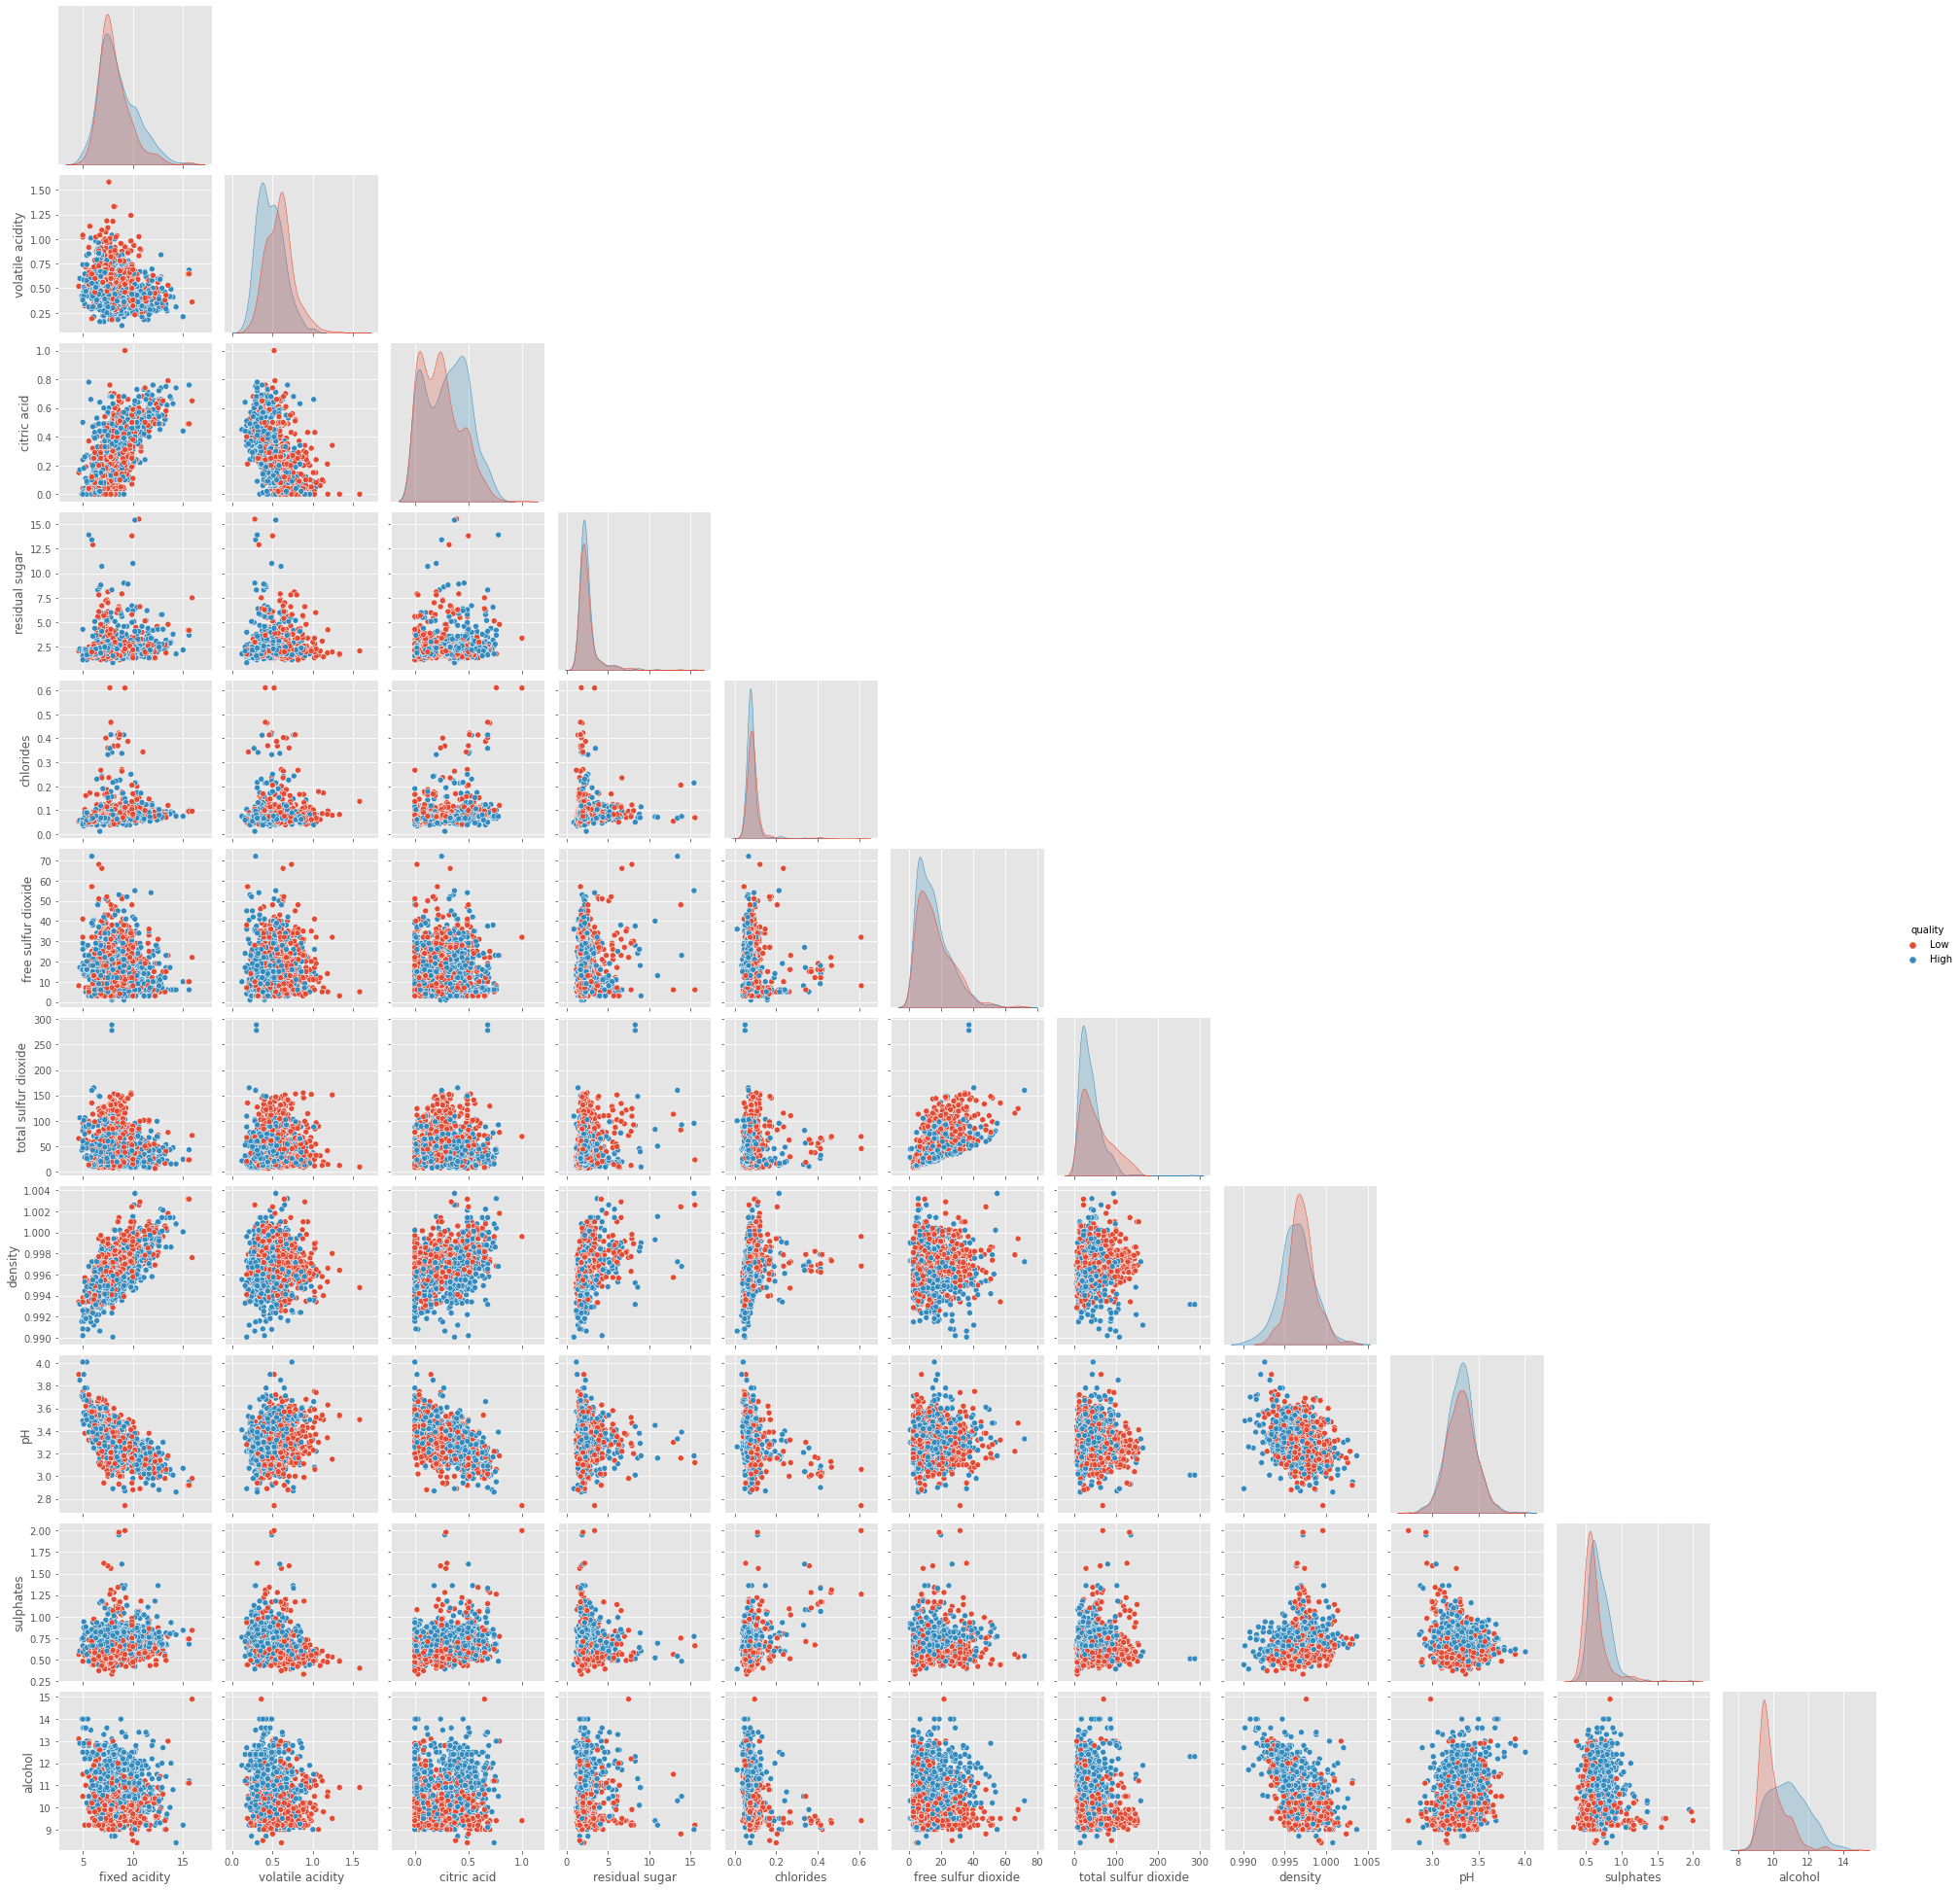

In [12]:
# Displays a pair plot of dataset attributes using quality attribute as hue
sns.pairplot(wine, hue='quality', corner=True)

## Preprocessing
***

In [13]:
# Creates dataframe with all attributes except quality (input features)
X = wine.drop("quality", axis = 1)

# Creates dataseries of just the quality attribute (output feature)
y = wine["quality"]

In [14]:
# Splits dataset into testing and training sets using X and y declared above
# test_size of 0.2 creates a 80/20 split of training data to test data
# random_state uses 5040 as a seed to make the splitting of sets deterministic
X_train, X_test, y_train, y_test = mod.train_test_split(X, y, test_size = 0.2, random_state = 5040)

**References:** 
* https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

## Decision Tree Demonstration
***

Decision trees are a supervised learning model that can be used for both classification and regression. This classifier builds a tree like structure composed of decision rules inferred from input data features. A target variable can be predicted by moving down through the tree, selecting branches based on the value of the data features. For the purposes of this notebook the decision tree will be used for classification.
***

In [15]:
# Selects decision tree classifier
dt = tr.DecisionTreeClassifier()

In [16]:
# Builds classifer using input and output training data
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [17]:
# Creates predictions of output data based on input testing data 
predictions = dt.predict(X_test)

<AxesSubplot:>

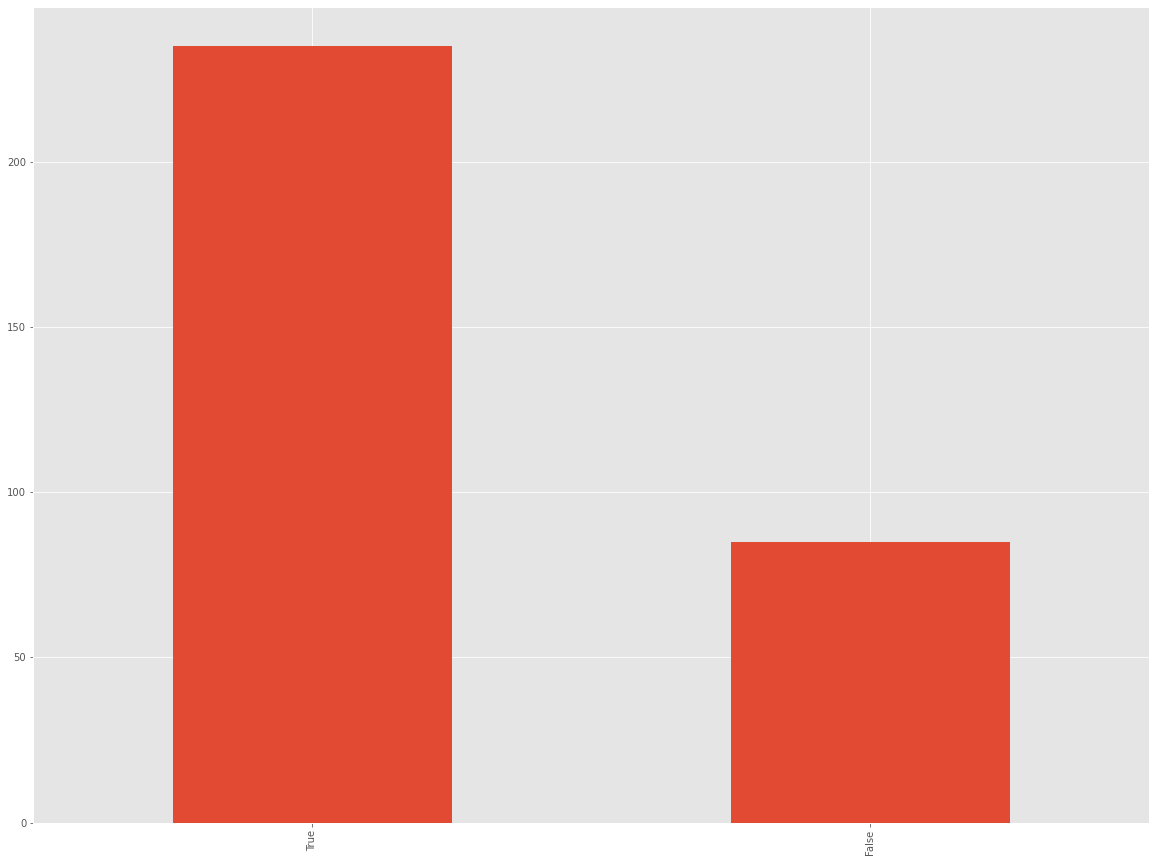

In [18]:
# Displays barchart of showing quanity of correct and incorrect predictions
(predictions == y_test).value_counts().plot(kind='bar')

In [19]:
# Displays accuracy of classifier's correct predictions as a precentage
accuracy = dt.score(X_test, y_test) * 100
print(f"Accuracy: {accuracy} %")

Accuracy: 73.4375 %


In [20]:
# Preforming cross validation using decision tree classifier and dataset input and output features
# cv determines number of folds dataset is split into during cross validation
dt_cv_scores = mod.cross_val_score(dt, X, y, cv = 10)
dt_cv_scores

array([0.575     , 0.74375   , 0.575     , 0.6       , 0.575     ,
       0.7375    , 0.68125   , 0.7       , 0.55      , 0.67295597])

In [21]:
# Prints average and standard deviation of cross validation scores
print(f"Mean: {dt_cv_scores.mean()} \t Standard Deviation: {dt_cv_scores.std()}")

Mean: 0.6410455974842767 	 Standard Deviation: 0.07001574004239752


## Random Forest Demostration
***

In [22]:
# Selects random forest classifier
rf = ens.RandomForestClassifier()

In [23]:
# Builds classifer using input and output training data
rf.fit(X_train, y_train)

RandomForestClassifier()

In [24]:
# Creates predictions of output data based on input testing data 
predictions = rf.predict(X_test)

<AxesSubplot:>

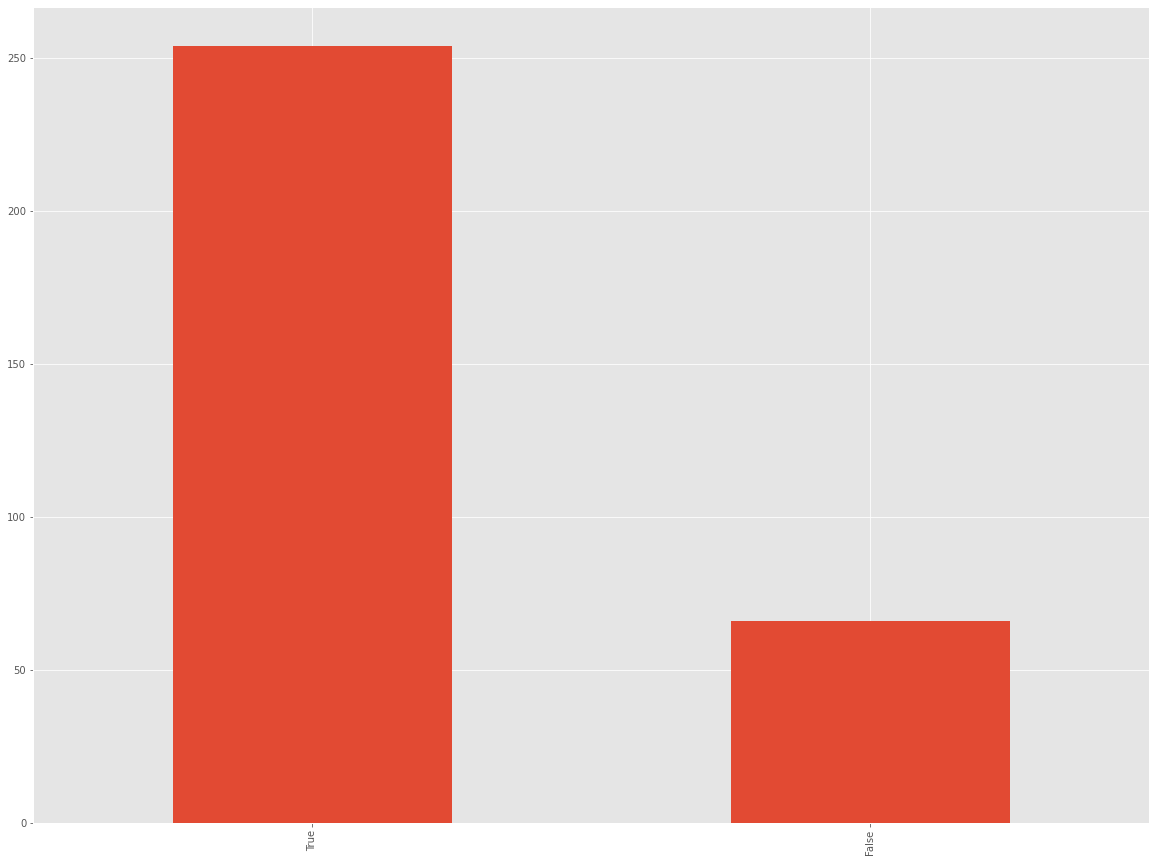

In [25]:
# Displays barchart of showing quanity of correct and incorrect predictions
(predictions == y_test).value_counts().plot(kind='bar')

In [26]:
# Displays accuracy of classifiers correct predictions as a precentage
accuracy = rf.score(X_test, y_test) * 100
print(f"Accuracy: {accuracy} %")

Accuracy: 79.375 %


In [27]:
# Preforming cross validation using random forest classifier and dataset input and output features
rf_cv_scores = mod.cross_val_score(rf, X, y, cv = 10)
rf_cv_scores

array([0.5875    , 0.7875    , 0.725     , 0.6875    , 0.73125   ,
       0.8125    , 0.75      , 0.74375   , 0.74375   , 0.68553459])

In [28]:
# Prints average and standard deviation of cross validation scores
print(f"Mean: {rf_cv_scores.mean()} \t Standard Deviation: {rf_cv_scores.std()}")

Mean: 0.7254284591194968 	 Standard Deviation: 0.05898971962976045


## Algorithm Demo #3